<a href="https://colab.research.google.com/github/damilola2010/Pizza_Sales_Analysis/blob/main/Pizzaplace.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sb


In [2]:
#Load thr csv file on local machine to google collaboratory
from google.colab import files
 
 
uploaded = files.upload()

Saving order_details.csv to order_details.csv
Saving orders.csv to orders.csv
Saving pizza_types.csv to pizza_types.csv
Saving pizzas.csv to pizzas.csv


In [3]:
# load the CSV files into DataFrames
df1 = pd.read_csv('order_details.csv')
df2 = pd.read_csv('orders.csv')
df3 = pd.read_csv('pizza_types.csv', encoding='cp1252')
df4 = pd.read_csv('pizzas.csv')

In [4]:
df1.head()

,order_details_id,order_id,pizza_id,quantity
0,1,1,hawaiian_m,1
1,2,2,classic_dlx_m,1
2,3,2,five_cheese_l,1
3,4,2,ital_supr_l,1
4,5,2,mexicana_m,1


In [5]:
df2.head()

,order_id,date,time
0,1,2015-01-01,11:38:36
1,2,2015-01-01,11:57:40
2,3,2015-01-01,12:12:28
3,4,2015-01-01,12:16:31
4,5,2015-01-01,12:21:30


In [6]:
df3.head()

,pizza_type_id,name,category,ingredients
0,bbq_ckn,The Barbecue Chicken Pizza,Chicken,"Barbecued Chicken, Red Peppers, Green Peppers,..."
1,cali_ckn,The California Chicken Pizza,Chicken,"Chicken, Artichoke, Spinach, Garlic, Jalapeno ..."
2,ckn_alfredo,The Chicken Alfredo Pizza,Chicken,"Chicken, Red Onions, Red Peppers, Mushrooms, A..."
3,ckn_pesto,The Chicken Pesto Pizza,Chicken,"Chicken, Tomatoes, Red Peppers, Spinach, Garli..."
4,southw_ckn,The Southwest Chicken Pizza,Chicken,"Chicken, Tomatoes, Red Peppers, Red Onions, Ja..."


In [7]:
df4.head()

,pizza_id,pizza_type_id,size,price
0,bbq_ckn_s,bbq_ckn,S,12.75
1,bbq_ckn_m,bbq_ckn,M,16.75
2,bbq_ckn_l,bbq_ckn,L,20.75
3,cali_ckn_s,cali_ckn,S,12.75
4,cali_ckn_m,cali_ckn,M,16.75


In [14]:
# joining the two dataframes on the "pizza_id" column, and add all columns from df4 to df1.
merged_df1_df4 = pd.merge(df1, df4, on='pizza_id')



In [15]:
#merging the resulting dataframe with df3 on the "pizza_type_id" column
merged_df1_df4_df3 = pd.merge(merged_df1_df4, df3, on='pizza_type_id')


In [12]:
final_df = pd.merge(merged_df1_df4_df3, df2, on='order_id')


In [13]:
final_df.head()

,order_details_id,order_id,pizza_id,quantity,pizza_type_id,size,price,name,category,ingredients,date,time
0,1,1,hawaiian_m,1,hawaiian,M,13.25,The Hawaiian Pizza,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",2015-01-01,11:38:36
1,179,77,hawaiian_m,1,hawaiian,M,13.25,The Hawaiian Pizza,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",2015-01-02,12:22:46
2,178,77,bbq_ckn_m,1,bbq_ckn,M,16.75,The Barbecue Chicken Pizza,Chicken,"Barbecued Chicken, Red Peppers, Green Peppers,...",2015-01-02,12:22:46
3,357,146,hawaiian_m,1,hawaiian,M,13.25,The Hawaiian Pizza,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",2015-01-03,14:22:10
4,355,146,cali_ckn_l,1,cali_ckn,L,20.75,The California Chicken Pizza,Chicken,"Chicken, Artichoke, Spinach, Garlic, Jalapeno ...",2015-01-03,14:22:10


In [19]:
#Downloading the final df to work on PowerBI
final_df.to_csv("output.csv")
from google.colab import files
files.download("output.csv")



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## Exploaratory Data Analysis and Data Cleaning

This project was carried out using SQL and PowerBi, I just want to dabble with it a little bit in Python

In [20]:
#Missing Values
missing_values = final_df.isna().sum()
print(missing_values)


order_details_id    0
order_id            0
pizza_id            0
quantity            0
pizza_type_id       0
size                0
price               0
name                0
category            0
ingredients         0
date                0
time                0
dtype: int64


In [22]:
#Duplicates
duplicate_rows = final_df.duplicated().sum()
print(duplicate_rows)


0


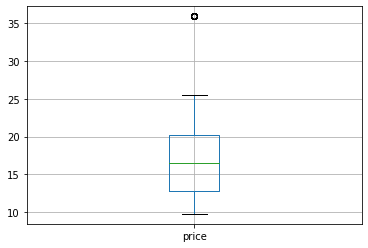

In [23]:
#Checking for outliers
final_df.boxplot(column = 'price')


In [24]:
#Removing Outliers
final_df = final_df[final_df['price'].between(final_df['price'].quantile(.25), final_df['price'].quantile(.75))]


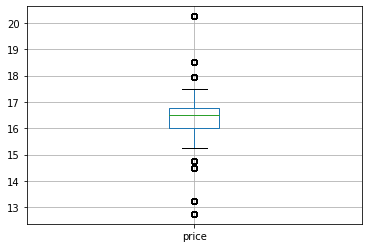

In [25]:
#Checking for outliers
final_df.boxplot(column = 'price')


## Visualization

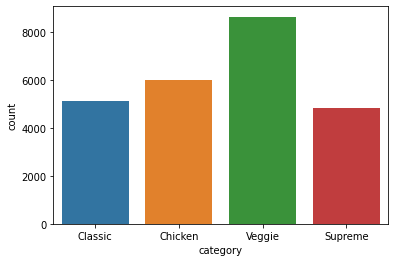

In [27]:
#Top Selling Category
import seaborn as sns
sns.countplot(x='category', data=final_df)



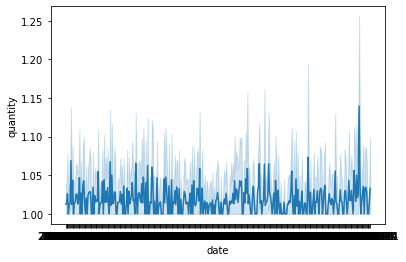

In [30]:
#Pizza Sold by date

sns.lineplot(x='date', y='quantity', data=final_df)


Not pretty enough, getting the month as a separate column


In [31]:
final_df['date'] = pd.to_datetime(final_df['date'])
final_df['month'] = final_df['date'].dt.month


In [33]:
final_df.head(100)

,order_details_id,order_id,pizza_id,quantity,pizza_type_id,size,price,name,category,ingredients,date,time,month
0,1,1,hawaiian_m,1,hawaiian,M,13.25,The Hawaiian Pizza,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",2015-01-01,11:38:36,1
1,179,77,hawaiian_m,1,hawaiian,M,13.25,The Hawaiian Pizza,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",2015-01-02,12:22:46,1
2,178,77,bbq_ckn_m,1,bbq_ckn,M,16.75,The Barbecue Chicken Pizza,Chicken,"Barbecued Chicken, Red Peppers, Green Peppers,...",2015-01-02,12:22:46,1
3,357,146,hawaiian_m,1,hawaiian,M,13.25,The Hawaiian Pizza,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",2015-01-03,14:22:10,1
5,356,146,four_cheese_m,1,four_cheese,M,14.75,The Four Cheese Pizza,Veggie,"Ricotta Cheese, Gorgonzola Piccante Cheese, Mo...",2015-01-03,14:22:10,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
131,5827,2584,hawaiian_m,1,hawaiian,M,13.25,The Hawaiian Pizza,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",2015-02-12,18:25:21,2
133,5987,2652,hawaiian_m,1,hawaiian,M,13.25,The Hawaiian Pizza,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",2015-02-13,21:00:56,2
134,6078,2697,hawaiian_m,1,hawaiian,M,13.25,The Hawaiian Pizza,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",2015-02-14,18:43:18,2
135,6079,2697,mexicana_m,1,mexicana,M,16.00,The Mexicana Pizza,Veggie,"Tomatoes, Red Peppers, Jalapeno Peppers, Red O...",2015-02-14,18:43:18,2


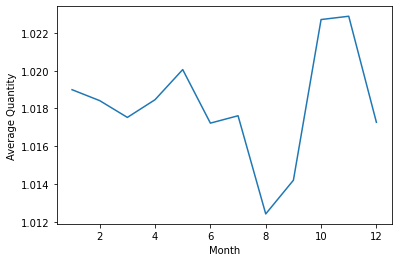

In [34]:
#Re-plotting

import matplotlib.pyplot as plt
average_pizza_sold_by_month = final_df.groupby(['month'])['quantity'].mean()
average_pizza_sold_by_month.plot(kind = 'line',x='month', y='quantity')
plt.xlabel('Month')
plt.ylabel('Average Quantity')
plt.show()


## Analysis

### Q1) How many customers do we have each day? Are there any peak hours?

In [37]:
#Customers per day
customers_per_day = final_df.groupby('date')['order_id'].nunique()
print(customers_per_day)


date
2015-01-01    50
2015-01-02    47
2015-01-03    48
2015-01-04    31
2015-01-05    43
              ..
2015-12-27    27
2015-12-28    30
2015-12-29    20
2015-12-30    25
2015-12-31    56
Name: order_id, Length: 358, dtype: int64


In the above, I  used the groupby() function in pandas to group the data by the 'date' column and then used the 'count()' function to count the number of unique 'order_id' values per day. This gave the number of customers per day.

In [38]:
#Checking for peak hours
customers_per_hour = final_df.groupby('time')['order_id'].nunique()
print(customers_per_hour)


time
09:52:21    1
10:34:34    1
10:43:04    1
10:50:46    1
10:52:26    1
           ..
23:05:08    1
23:05:16    1
23:05:17    1
23:05:24    1
23:05:52    1
Name: order_id, Length: 12582, dtype: int64


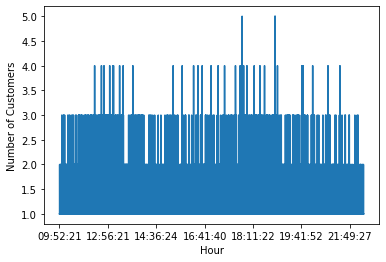

In [39]:
#Visualizing the result

customers_per_hour.plot(kind='line', x='time', y='order_id')
plt.xlabel('Hour')
plt.ylabel('Number of Customers')
plt.show()


### Q2) How many pizzas are typically in an order? Do we have any bestsellers?

In [41]:
#How many pizzas in an order
pizzas_per_order = final_df.groupby('order_id')['quantity'].sum()
print(pizzas_per_order)


order_id
1        1
2        3
3        1
4        1
5        1
        ..
21346    2
21347    2
21348    2
21349    1
21350    1
Name: quantity, Length: 15308, dtype: int64


Again, Ii used  groupby() function to group the data by the 'order_id' column and then use the 'sum()' function to sum the 'quantity' column. This gave you the total number of pizzas in each order.

In [43]:
#Best Selling Pizza
bestsellers = final_df.groupby('name')['quantity'].sum()
print(bestsellers)


name
The Barbecue Chicken Pizza                    1440
The Calabrese Pizza                            838
The California Chicken Pizza                  1443
The Chicken Alfredo Pizza                      799
The Chicken Pesto Pizza                        574
The Classic Deluxe Pizza                      1181
The Five Cheese Pizza                         1409
The Four Cheese Pizza                         1902
The Greek Pizza                                281
The Green Garden Pizza                         397
The Hawaiian Pizza                            1402
The Italian Capocollo Pizza                    404
The Italian Supreme Pizza                      941
The Italian Vegetables Pizza                   791
The Mediterranean Pizza                        645
The Mexicana Pizza                            1322
The Napolitana Pizza                           427
The Pepper Salami Pizza                        428
The Pepperoni Pizza                            728
The Pepperoni, Mushroom, a

Wow, Berbecue Chicken Pizza steady won. I group the data by the name column in the final_df  and then used the 'sum()' function to sum the 'quantity' column

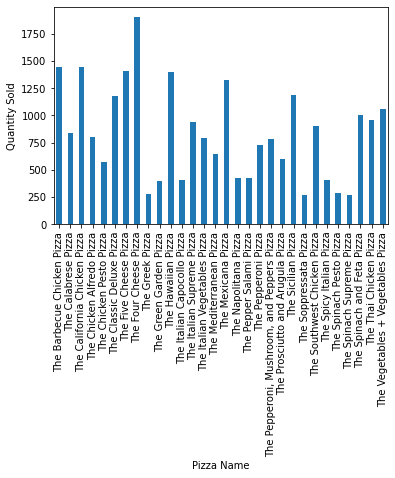

In [55]:
#Visuals

bestsellers.plot(kind='bar', x='pizza_name', y='quantity')
plt.xlabel('Pizza Name')
plt.ylabel('Quantity Sold')
plt.show()


### Q3) How much money did we make this year? Can we indentify any seasonality in the sales?

In [45]:
#Revenue by Year
#extracting the year from the 'date' column using the dt accessor
final_df['year'] = final_df['date'].dt.year



In [46]:
revenue_by_year = final_df.groupby('year')['price'].sum()
print(revenue_by_year)

year
2015    407598.1
Name: price, dtype: float64


Seasonality in sales, i will group the data by mointh and use sum () for the price column

In [47]:
#Seasonality
revenue_by_month = final_df.groupby('month')['price'].sum()
print(revenue_by_month)


month
1     34892.45
2     32348.70
3     34978.15
4     33949.50
5     34656.15
6     34679.15
7     36710.40
8     34428.70
9     31434.70
10    32098.90
11    34825.85
12    32595.45
Name: price, dtype: float64


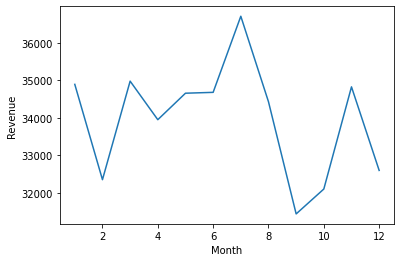

In [48]:
#Visuals
import matplotlib.pyplot as plt
revenue_by_month.plot(kind='line', x='month', y='price')
plt.xlabel('Month')
plt.ylabel('Revenue')
plt.show()


Looks like Jjune hapens to be a very profitable month, which is quite odd. Unsuprisignly, there are low sales or low revenue generated in december, simce thats an holiday mothn and everyone is home having christmas dinner, less people order food online.

### Q4) Are there any pizzas we should take of the menu, or any promotions we could leverage?

In [53]:
#Bottom 5 Pizza Sold
least_sold_pizzas = final_df.groupby('name')['quantity'].sum().sort_values(ascending=True).head(5)
print(least_sold_pizzas)



name
The Spinach Supreme Pizza    267
The Soppressata Pizza        268
The Greek Pizza              281
The Spinach Pesto Pizza      282
The Green Garden Pizza       397
Name: quantity, dtype: int64


Those could be looked into or taken off the menu

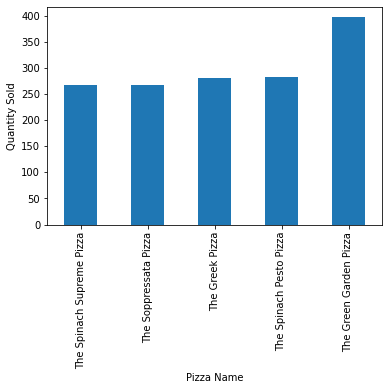

In [54]:

least_sold_pizzas.plot(kind='bar', x='pizza_name', y='quantity')
plt.xlabel('Pizza Name')
plt.ylabel('Quantity Sold')
plt.show()


### Word Cloud

In [57]:
!pip install wordcloud


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [58]:
from wordcloud import WordCloud

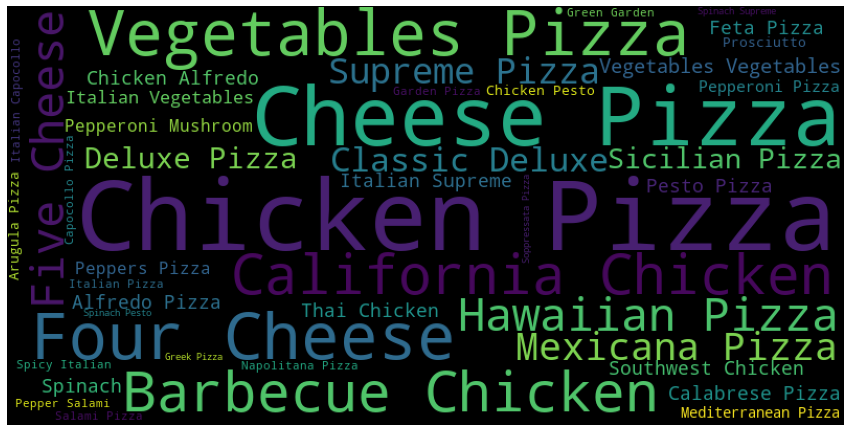

In [59]:
wordcloud = WordCloud(width=800, height=400, max_words=100).generate(' '.join(final_df['name']))
plt.figure(figsize=(15,8))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()


# Thank you for Reading !!!!!